# Predicting Depression

In [178]:
# Importing numpy and setting a random seed
import numpy as np
np.random.seed(123)

In [179]:
# Importing packages and setting a couple of style options
import pandas as pd
import glob, os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [180]:
# Setting pandas to display max columns and rows
pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', None)

# Setting pandas inf values to be nan
pd.set_option('mode.use_inf_as_na', True)

# Turning off scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [181]:
# This will cause the project functions py file to keep refreshed
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [182]:
# Loading in the custom project functions and some tools to look at them
import project_functions as pf
import inspect
from IPython.display import Markdown, display

In [183]:
# Looking at function
func = inspect.getsource(pf.glob_concat)
display(Markdown("```python\n"+func+"\n```"))

```python
def glob_concat(path, file_str):
    '''
    Looks for files in folder path and combines them into a DataFrame.
    Also sets the index to be the SEQN column.
    
    Args:
        path (str): Location on computer where files are located.
        file_str (str): Specific search query of which files to find.
        
    Returns:
        Displays the files that were found for verification and returns the 
        DataFrame of all files after pd.concat is performed and the index is set.
    
    Example:
        combined_df = glob_concat(r'File/File', '*.XPT')
    '''
    
    # Find the files in the folders
    files = glob.glob(os.path.join(path, file_str))

    # Print the files for verification when running the function
    display(files)

    # Combining all the files into a DataFrame
    df_files = [pd.read_sas(file) for file in files]
    combined_df = pd.concat(df_files)

    # Setting the index of the new DataFrame
    combined_df.SEQN = combined_df.SEQN.astype('int64')
    combined_df.set_index('SEQN', verify_integrity=True, inplace=True)
    return combined_df

```

In [184]:
# Combining all the files for the target
path = r'C:/Users/LaptopCheckout/Documents/CSCE_5210/data'
df_target = pf.glob_concat(path, '*.XPT')

['C:/Users/LaptopCheckout/Documents/CSCE_5210/data\\DPQ_H.XPT',
 'C:/Users/LaptopCheckout/Documents/CSCE_5210/data\\DPQ_I.XPT']

In [185]:
# Dropping the final column
df_target.drop(columns=['DPQ100'], inplace=True)

In [186]:
df_target.head()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
SEQN,,,,,,,,,
73557,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
73558,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
73559,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
73561,2.000,1.000,0.000,3.000,3.000,0.000,0.000,0.000,0.000
73562,3.000,3.000,3.000,3.000,3.000,1.000,2.000,1.000,0.000


In [187]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11659 entries, 73557 to 93702
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DPQ010  10562 non-null  float64
 1   DPQ020  10560 non-null  float64
 2   DPQ030  10559 non-null  float64
 3   DPQ040  10557 non-null  float64
 4   DPQ050  10557 non-null  float64
 5   DPQ060  10556 non-null  float64
 6   DPQ070  10555 non-null  float64
 7   DPQ080  10555 non-null  float64
 8   DPQ090  10554 non-null  float64
dtypes: float64(9)
memory usage: 910.9 KB


In [188]:
# Checking the null values
df_target.isna().sum()

DPQ010    1097
DPQ020    1099
DPQ030    1100
DPQ040    1102
DPQ050    1102
DPQ060    1103
DPQ070    1104
DPQ080    1104
DPQ090    1105
dtype: int64

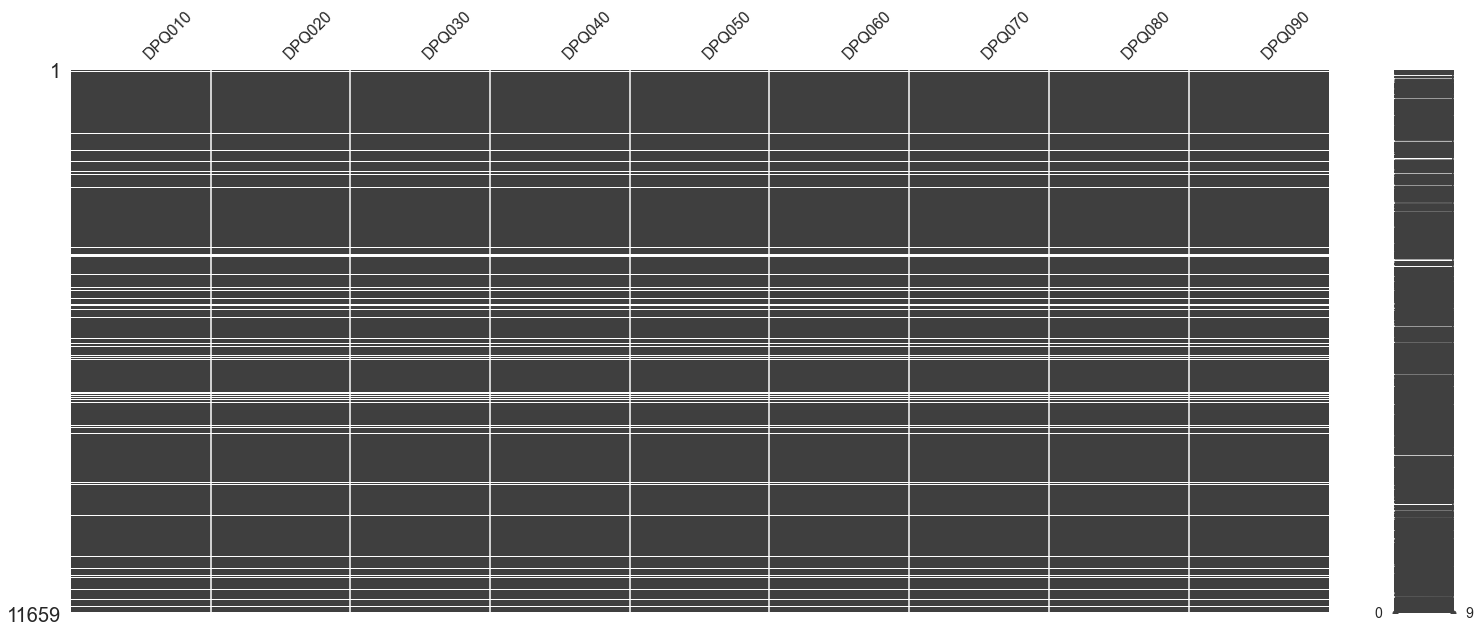

In [189]:
# Looking at the pattern of null values
import missingno as ms
ms.matrix(df_target);

In [190]:
# Removing all null entries
df_target.dropna(inplace=True)

In [191]:
# Checking for null values and how many entries are left
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10554 entries, 73557 to 93702
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DPQ010  10554 non-null  float64
 1   DPQ020  10554 non-null  float64
 2   DPQ030  10554 non-null  float64
 3   DPQ040  10554 non-null  float64
 4   DPQ050  10554 non-null  float64
 5   DPQ060  10554 non-null  float64
 6   DPQ070  10554 non-null  float64
 7   DPQ080  10554 non-null  float64
 8   DPQ090  10554 non-null  float64
dtypes: float64(9)
memory usage: 824.5 KB


In [192]:
df_target.head()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
SEQN,,,,,,,,,
73557,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
73558,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
73559,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
73561,2.000,1.000,0.000,3.000,3.000,0.000,0.000,0.000,0.000
73562,3.000,3.000,3.000,3.000,3.000,1.000,2.000,1.000,0.000


In [193]:
# Looking at function that performs .value_counts()
func = inspect.getsource(pf.val_counts)
display(Markdown("```python\n"+func+"\n```"))

```python
def val_counts(df):
    '''
    Display value counts for all the columns in a DataFrame.

    Args:
        df (DataFrame): DataFrame to perform .value_counts() on each column. 

    Returns:
        Value counts for each column with some visual cues between columns.
    '''

    for col in df.columns:
        print(f'{col} value counts', '\n')
        display(df[col].value_counts(dropna=False))
        print('--------------------------------------')

```

In [194]:
# Looking at the values for the columns
pf.val_counts(df_target)

DPQ010 value counts 



0.000    7779
1.000    1731
2.000     547
3.000     480
9.000      10
7.000       7
Name: DPQ010, dtype: int64

--------------------------------------
DPQ020 value counts 



0.000    7988
1.000    1775
2.000     422
3.000     361
7.000       5
9.000       3
Name: DPQ020, dtype: int64

--------------------------------------
DPQ030 value counts 



0.000    6603
1.000    2322
3.000     920
2.000     705
7.000       2
9.000       2
Name: DPQ030, dtype: int64

--------------------------------------
DPQ040 value counts 



0.000    5113
1.000    3622
3.000     930
2.000     887
7.000       2
Name: DPQ040, dtype: int64

--------------------------------------
DPQ050 value counts 



0.000    7845
1.000    1699
2.000     519
3.000     485
9.000       6
Name: DPQ050, dtype: int64

--------------------------------------
DPQ060 value counts 



0.000    8768
1.000    1176
3.000     303
2.000     301
9.000       5
7.000       1
Name: DPQ060, dtype: int64

--------------------------------------
DPQ070 value counts 



0.000    8744
1.000    1109
3.000     356
2.000     340
9.000       4
7.000       1
Name: DPQ070, dtype: int64

--------------------------------------
DPQ080 value counts 



0.000    9397
1.000     715
2.000     234
3.000     202
9.000       5
7.000       1
Name: DPQ080, dtype: int64

--------------------------------------
DPQ090 value counts 



0.000    10169
1.000      248
2.000       68
3.000       62
9.000        5
7.000        2
Name: DPQ090, dtype: int64

--------------------------------------


In [195]:
# Removing the entries that contain ambiguous answers(7 and 9)
df_target = df_target[(df_target != 7) & (df_target != 9)]

In [196]:
df_target.head()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
SEQN,,,,,,,,,
73557,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
73558,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
73559,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
73561,2.000,1.000,0.000,3.000,3.000,0.000,0.000,0.000,0.000
73562,3.000,3.000,3.000,3.000,3.000,1.000,2.000,1.000,0.000


In [197]:
# Checking that the 7s and 9s are removed
pf.val_counts(df_target)

DPQ010 value counts 



0.000    7779
1.000    1731
2.000     547
3.000     480
NaN        17
Name: DPQ010, dtype: int64

--------------------------------------
DPQ020 value counts 



0.000    7988
1.000    1775
2.000     422
3.000     361
NaN         8
Name: DPQ020, dtype: int64

--------------------------------------
DPQ030 value counts 



0.000    6603
1.000    2322
3.000     920
2.000     705
NaN         4
Name: DPQ030, dtype: int64

--------------------------------------
DPQ040 value counts 



0.000    5113
1.000    3622
3.000     930
2.000     887
NaN         2
Name: DPQ040, dtype: int64

--------------------------------------
DPQ050 value counts 



0.000    7845
1.000    1699
2.000     519
3.000     485
NaN         6
Name: DPQ050, dtype: int64

--------------------------------------
DPQ060 value counts 



0.000    8768
1.000    1176
3.000     303
2.000     301
NaN         6
Name: DPQ060, dtype: int64

--------------------------------------
DPQ070 value counts 



0.000    8744
1.000    1109
3.000     356
2.000     340
NaN         5
Name: DPQ070, dtype: int64

--------------------------------------
DPQ080 value counts 



0.000    9397
1.000     715
2.000     234
3.000     202
NaN         6
Name: DPQ080, dtype: int64

--------------------------------------
DPQ090 value counts 



0.000    10169
1.000      248
2.000       68
3.000       62
NaN          7
Name: DPQ090, dtype: int64

--------------------------------------


In [198]:
# Checking the entries
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10554 entries, 73557 to 93702
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DPQ010  10537 non-null  float64
 1   DPQ020  10546 non-null  float64
 2   DPQ030  10550 non-null  float64
 3   DPQ040  10552 non-null  float64
 4   DPQ050  10548 non-null  float64
 5   DPQ060  10548 non-null  float64
 6   DPQ070  10549 non-null  float64
 7   DPQ080  10548 non-null  float64
 8   DPQ090  10547 non-null  float64
dtypes: float64(9)
memory usage: 824.5 KB


In [199]:
# Looking at null values
df_target.isna().sum()

DPQ010    17
DPQ020     8
DPQ030     4
DPQ040     2
DPQ050     6
DPQ060     6
DPQ070     5
DPQ080     6
DPQ090     7
dtype: int64

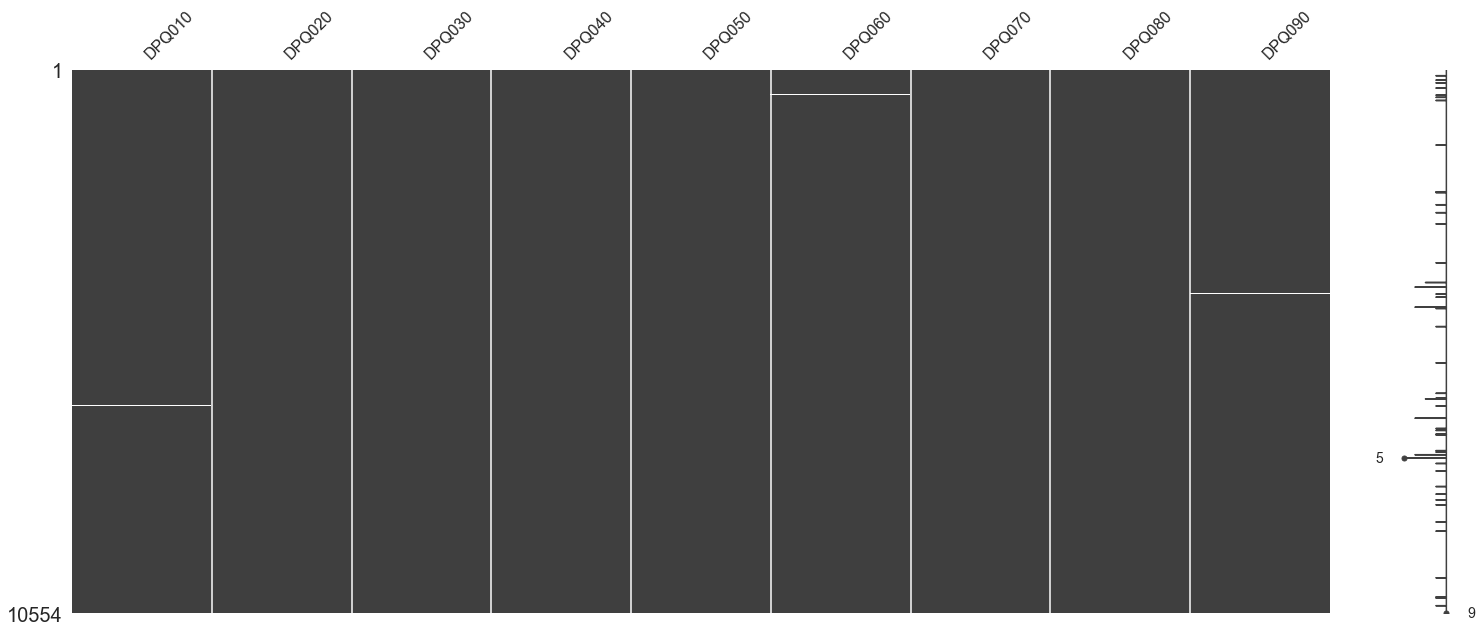

In [200]:
# Visualizing null values
ms.matrix(df_target);

In [201]:
# Dropping null values
df_target.dropna(inplace=True)

In [202]:
# Checking entries and columns
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10506 entries, 73557 to 93702
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DPQ010  10506 non-null  float64
 1   DPQ020  10506 non-null  float64
 2   DPQ030  10506 non-null  float64
 3   DPQ040  10506 non-null  float64
 4   DPQ050  10506 non-null  float64
 5   DPQ060  10506 non-null  float64
 6   DPQ070  10506 non-null  float64
 7   DPQ080  10506 non-null  float64
 8   DPQ090  10506 non-null  float64
dtypes: float64(9)
memory usage: 820.8 KB


In [203]:
# Castin all the columns to be int type
df_target = df_target.astype('int64')

In [204]:
df_target.head()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
SEQN,,,,,,,,,
73557,1,0,0,0,0,0,0,0,0
73558,2,0,0,0,0,0,0,0,0
73559,0,0,0,0,0,0,0,0,0
73561,2,1,0,3,3,0,0,0,0
73562,3,3,3,3,3,1,2,1,0


In [205]:
# Summing all the entries across each row
df_target['Total'] = df_target.sum(axis=1)

In [206]:
df_target.head()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,Total
SEQN,,,,,,,,,,
73557,1,0,0,0,0,0,0,0,0,1
73558,2,0,0,0,0,0,0,0,0,2
73559,0,0,0,0,0,0,0,0,0,0
73561,2,1,0,3,3,0,0,0,0,9
73562,3,3,3,3,3,1,2,1,0,19


In [207]:
# Looking at the totals
df_target.Total.value_counts(1)

0    0.313
1    0.155
2    0.124
3    0.087
4    0.067
5    0.049
6    0.041
7    0.031
8    0.023
9    0.021
10   0.016
12   0.011
11   0.010
13   0.009
14   0.008
16   0.006
15   0.005
18   0.004
17   0.004
19   0.004
20   0.002
21   0.002
22   0.002
24   0.002
23   0.001
25   0.001
27   0.000
26   0.000
Name: Total, dtype: float64

In [208]:
# Creating the target column based on the value in the total column
df_target['depression'] = df_target.Total.apply(
    lambda x: 'Not Depressed' if x<10 else 'Depressed')

In [209]:
# Looking at the target value counts
df_target.depression.value_counts(1)

Not Depressed   0.912
Depressed       0.088
Name: depression, dtype: float64

In [210]:
# Slicing out only the target column into its own DataFrame
target_clean = pd.DataFrame(df_target['depression'])
target_clean.head()

,depression
SEQN,
73557,Not Depressed
73558,Not Depressed
73559,Not Depressed
73561,Not Depressed
73562,Depressed


In [211]:
# Checking that the DataFrame has the expected number of entries
target_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10506 entries, 73557 to 93702
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   depression  10506 non-null  object
dtypes: object(1)
memory usage: 164.2+ KB


In [212]:
# Checking the values
target_clean.depression.value_counts(1)

Not Depressed   0.912
Depressed       0.088
Name: depression, dtype: float64

# Demographic Data

In [213]:
# Combining all the files for the demographic information
path = r'C:/Users\LaptopCheckout/Documents/CSCE_5210/dataDemogrophic'
df_demo = pf.glob_concat(path, '*.XPT')

['C:/Users\\LaptopCheckout/Documents/CSCE_5210/dataDemogrophic\\DEMO_H.XPT',
 'C:/Users\\LaptopCheckout/Documents/CSCE_5210/dataDemogrophic\\DEMO_I.XPT']

In [214]:
# Checking the DataFrame
df_demo.head()

,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73557,8.000,2.000,1.000,69.000,NaN,4.000,4.000,1.000,NaN,1.000,1.000,1.000,1.000,NaN,NaN,3.000,4.000,NaN,1.000,2.000,2.000,1.000,2.000,2.000,1.000,2.000,2.000,1.000,3.000,3.000,0.000,0.000,2.000,1.000,69.000,1.000,3.000,4.000,NaN,13281.237,13481.042,1.000,112.000,4.000,4.000,0.840
73558,8.000,2.000,1.000,54.000,NaN,3.000,3.000,1.000,NaN,2.000,NaN,1.000,1.000,NaN,NaN,3.000,1.000,NaN,1.000,2.000,2.000,1.000,2.000,2.000,1.000,2.000,2.000,1.000,4.000,4.000,0.000,2.000,0.000,1.000,54.000,1.000,3.000,1.000,1.000,23682.057,24471.770,1.000,108.000,7.000,7.000,1.780
73559,8.000,2.000,1.000,72.000,NaN,3.000,3.000,2.000,NaN,1.000,1.000,1.000,1.000,NaN,NaN,4.000,1.000,NaN,1.000,2.000,2.000,1.000,2.000,2.000,1.000,2.000,2.000,NaN,2.000,2.000,0.000,0.000,2.000,1.000,72.000,1.000,4.000,1.000,3.000,57214.803,57193.285,1.000,109.000,10.000,10.000,4.510
73560,8.000,2.000,1.000,9.000,NaN,3.000,3.000,1.000,119.000,NaN,NaN,1.000,1.000,NaN,3.000,NaN,NaN,NaN,1.000,1.000,2.000,1.000,2.000,2.000,1.000,2.000,2.000,1.000,4.000,4.000,0.000,2.000,0.000,1.000,33.000,1.000,3.000,1.000,4.000,55201.179,55766.512,2.000,109.000,9.000,9.000,2.520
73561,8.000,2.000,2.000,73.000,NaN,3.000,3.000,1.000,NaN,2.000,NaN,1.000,1.000,NaN,NaN,5.000,1.000,NaN,1.000,2.000,2.000,1.000,2.000,2.000,1.000,2.000,2.000,NaN,2.000,2.000,0.000,0.000,2.000,1.000,78.000,1.000,5.000,1.000,5.000,63709.667,65541.871,2.000,116.000,15.000,15.000,5.000


In [215]:
# Checking the columns and entries
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20146 entries, 73557 to 93702
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SDDSRVYR  20146 non-null  float64
 1   RIDSTATR  20146 non-null  float64
 2   RIAGENDR  20146 non-null  float64
 3   RIDAGEYR  20146 non-null  float64
 4   RIDAGEMN  1368 non-null   float64
 5   RIDRETH1  20146 non-null  float64
 6   RIDRETH3  20146 non-null  float64
 7   RIDEXMON  19357 non-null  float64
 8   RIDEXAGM  8273 non-null   float64
 9   DMQMILIZ  12410 non-null  float64
 10  DMQADFC   1070 non-null   float64
 11  DMDBORN4  20146 non-null  float64
 12  DMDCITZN  20140 non-null  float64
 13  DMDYRSUS  4144 non-null   float64
 14  DMDEDUC3  5450 non-null   float64
 15  DMDEDUC2  11488 non-null  float64
 16  DMDMARTL  11488 non-null  float64
 17  RIDEXPRG  2597 non-null   float64
 18  SIALANG   20146 non-null  float64
 19  SIAPROXY  20144 non-null  float64
 20  SIAINTRP  20146 non-null

In [216]:
# Creating a list of columns to check each one
df_demo.columns.sort_values()

Index(['AIALANGA', 'DMDBORN4', 'DMDCITZN', 'DMDEDUC2', 'DMDEDUC3', 'DMDFMSIZ',
       'DMDHHSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DMDHRAGE', 'DMDHRBR4',
       'DMDHREDU', 'DMDHRGND', 'DMDHRMAR', 'DMDHSEDU', 'DMDMARTL', 'DMDYRSUS',
       'DMQADFC', 'DMQMILIZ', 'FIAINTRP', 'FIALANG', 'FIAPROXY', 'INDFMIN2',
       'INDFMPIR', 'INDHHIN2', 'MIAINTRP', 'MIALANG', 'MIAPROXY', 'RIAGENDR',
       'RIDAGEMN', 'RIDAGEYR', 'RIDEXAGM', 'RIDEXMON', 'RIDEXPRG', 'RIDRETH1',
       'RIDRETH3', 'RIDSTATR', 'SDDSRVYR', 'SDMVPSU', 'SDMVSTRA', 'SIAINTRP',
       'SIALANG', 'SIAPROXY', 'WTINT2YR', 'WTMEC2YR'],
      dtype='object')

In [217]:
# Listing the columns to keep
demo_tokeep = ['DMDBORN', 'DMDBORN2', 'DMDBORN4', 'DMDCITZN', 'DMDEDUC2', 
               'DMDHHSIZ', 'DMDMARTL', 'DMQMILIT', 'DMQMILIZ', 'INDHHIN2', 
               'INDHHINC', 'RIAGENDR', 'RIDAGEYR', 'RIDEXPRG', 'RIDRETH1']

In [218]:
# Looking at the function that creates a new DataFrame with the wanted columns
func = inspect.getsource(pf.cols_tokeep)
display(Markdown("```python\n"+func+"\n```"))

```python
def cols_tokeep(df, col_list):
    '''
    Makes a copy of the passed in DataFrame and drops all columns except those
    specified in a list.
    
    Args:
        df(DataFrame): DataFrame to take specific columns from.
        col_list(list): List of columns in the DataFrame to be kept.
    
    Returns:
        New DataFrame that has only the columns specified from the col_list.
    
    Example:
        new_df = cols_tokeep(old_df, columns_list)
    '''
    df_copy = df.copy()
    for col in df_copy.columns:
        if col not in col_list:
            df_copy.drop(columns=[col], inplace=True)
        else:
            pass
    return df_copy

```

In [219]:
# Creating the new DataFrame with only the wanted columns
demo_clean = pf.cols_tokeep(df_demo, demo_tokeep)

In [220]:
# Checking the new DataFrame
demo_clean.head()

,RIAGENDR,RIDAGEYR,RIDRETH1,DMQMILIZ,DMDBORN4,DMDCITZN,DMDEDUC2,DMDMARTL,RIDEXPRG,DMDHHSIZ,INDHHIN2
SEQN,,,,,,,,,,,
73557,1.000,69.000,4.000,1.000,1.000,1.000,3.000,4.000,NaN,3.000,4.000
73558,1.000,54.000,3.000,2.000,1.000,1.000,3.000,1.000,NaN,4.000,7.000
73559,1.000,72.000,3.000,1.000,1.000,1.000,4.000,1.000,NaN,2.000,10.000
73560,1.000,9.000,3.000,NaN,1.000,1.000,NaN,NaN,NaN,4.000,9.000
73561,2.000,73.000,3.000,2.000,1.000,1.000,5.000,1.000,NaN,2.000,15.000


In [221]:
# Checking the entries and columns
demo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20146 entries, 73557 to 93702
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIAGENDR  20146 non-null  float64
 1   RIDAGEYR  20146 non-null  float64
 2   RIDRETH1  20146 non-null  float64
 3   DMQMILIZ  12410 non-null  float64
 4   DMDBORN4  20146 non-null  float64
 5   DMDCITZN  20140 non-null  float64
 6   DMDEDUC2  11488 non-null  float64
 7   DMDMARTL  11488 non-null  float64
 8   RIDEXPRG  2597 non-null   float64
 9   DMDHHSIZ  20146 non-null  float64
 10  INDHHIN2  19668 non-null  float64
dtypes: float64(11)
memory usage: 1.8 MB


In [222]:
# Listing the columns to reference for cleaning
demo_clean.columns.sort_values()

Index(['DMDBORN4', 'DMDCITZN', 'DMDEDUC2', 'DMDHHSIZ', 'DMDMARTL', 'DMQMILIZ',
       'INDHHIN2', 'RIAGENDR', 'RIDAGEYR', 'RIDEXPRG', 'RIDRETH1'],
      dtype='object')

## Birth Place

The birth place question changed slightly over time but was still very similar. For these columns, the null values are filled with zeros then everything is added across the rows to a single column to combine all the values into one.

In [223]:
# Checking column values
demo_clean.DMDBORN4.value_counts(dropna=False)

1.000     15995
2.000      4144
77.000        4
99.000        3
Name: DMDBORN4, dtype: int64

In [224]:
# Checking column values
demo_clean.DMDBORN4.value_counts(dropna=False)

1.000     15995
2.000      4144
77.000        4
99.000        3
Name: DMDBORN4, dtype: int64

In [225]:
# Checking column values
demo_clean.DMDBORN4.value_counts(dropna=False)

1.000     15995
2.000      4144
77.000        4
99.000        3
Name: DMDBORN4, dtype: int64

In [226]:
# Fill all null values with zero

demo_clean.DMDBORN4.fillna(0, inplace=True)

In [227]:
# Add all the columns together to get the values in one column
demo_clean['birth_place'] =  demo_clean['DMDBORN4']

In [228]:
# Verify new column exists
demo_clean.head()

,RIAGENDR,RIDAGEYR,RIDRETH1,DMQMILIZ,DMDBORN4,DMDCITZN,DMDEDUC2,DMDMARTL,RIDEXPRG,DMDHHSIZ,INDHHIN2,birth_place
SEQN,,,,,,,,,,,,
73557,1.000,69.000,4.000,1.000,1.000,1.000,3.000,4.000,NaN,3.000,4.000,1.000
73558,1.000,54.000,3.000,2.000,1.000,1.000,3.000,1.000,NaN,4.000,7.000,1.000
73559,1.000,72.000,3.000,1.000,1.000,1.000,4.000,1.000,NaN,2.000,10.000,1.000
73560,1.000,9.000,3.000,NaN,1.000,1.000,NaN,NaN,NaN,4.000,9.000,1.000
73561,2.000,73.000,3.000,2.000,1.000,1.000,5.000,1.000,NaN,2.000,15.000,1.000


In [229]:
# Check values of new column to make sure everything is as expected
demo_clean.birth_place.value_counts(dropna=False)

1.000     15995
2.000      4144
77.000        4
99.000        3
Name: birth_place, dtype: int64

In [230]:
# Drop the old columns that are no longer needed
demo_clean.drop(columns=['DMDBORN4'], inplace=True)

In [231]:
# Verifying the columns were dropped
demo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20146 entries, 73557 to 93702
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RIAGENDR     20146 non-null  float64
 1   RIDAGEYR     20146 non-null  float64
 2   RIDRETH1     20146 non-null  float64
 3   DMQMILIZ     12410 non-null  float64
 4   DMDCITZN     20140 non-null  float64
 5   DMDEDUC2     11488 non-null  float64
 6   DMDMARTL     11488 non-null  float64
 7   RIDEXPRG     2597 non-null   float64
 8   DMDHHSIZ     20146 non-null  float64
 9   INDHHIN2     19668 non-null  float64
 10  birth_place  20146 non-null  float64
dtypes: float64(11)
memory usage: 1.8 MB


## Veteran

In [232]:
# Check column values
demo_clean.DMQMILIZ.value_counts(dropna=False)

2.000    11339
NaN       7736
1.000     1070
7.000        1
Name: DMQMILIZ, dtype: int64

In [233]:
# Fill null values with zero

demo_clean.DMQMILIZ.fillna(0, inplace=True)

In [234]:
# Add columns straight across into a new column
demo_clean['veteran'] =  demo_clean['DMQMILIZ']

In [235]:
# Checking the values are as expected of the new column
demo_clean.veteran.value_counts(dropna=False)

2.000    11339
0.000     7736
1.000     1070
7.000        1
Name: veteran, dtype: int64

In [236]:
# Drop the old columns that are no longer needed
demo_clean.drop(columns=['DMQMILIZ'], inplace=True)

In [237]:
# Checking the columns
demo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20146 entries, 73557 to 93702
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RIAGENDR     20146 non-null  float64
 1   RIDAGEYR     20146 non-null  float64
 2   RIDRETH1     20146 non-null  float64
 3   DMDCITZN     20140 non-null  float64
 4   DMDEDUC2     11488 non-null  float64
 5   DMDMARTL     11488 non-null  float64
 6   RIDEXPRG     2597 non-null   float64
 7   DMDHHSIZ     20146 non-null  float64
 8   INDHHIN2     19668 non-null  float64
 9   birth_place  20146 non-null  float64
 10  veteran      20146 non-null  float64
dtypes: float64(11)
memory usage: 1.8 MB


## Household Income

In [238]:
# Checking column values
demo_clean.INDHHIN2.value_counts(dropna=False)

15.000    3415
6.000     2202
7.000     1873
14.000    1780
8.000     1553
5.000     1507
4.000     1258
3.000     1176
9.000     1150
10.000     876
2.000      780
12.000     615
1.000      523
NaN        478
77.000     472
13.000     279
99.000     209
Name: INDHHIN2, dtype: int64

In [239]:
# Fill all null values with zero

demo_clean.INDHHIN2.fillna(0, inplace=True)

In [240]:
# Add columns straight across into a new column
demo_clean['household_income'] =  demo_clean['INDHHIN2']

In [241]:
# Checking that the values of the new column are as expected
demo_clean.household_income.value_counts(dropna=False)

15.000    3415
6.000     2202
7.000     1873
14.000    1780
8.000     1553
5.000     1507
4.000     1258
3.000     1176
9.000     1150
10.000     876
2.000      780
12.000     615
1.000      523
0.000      478
77.000     472
13.000     279
99.000     209
Name: household_income, dtype: int64

In [242]:
# Dropping the old columns that are no longer needed
demo_clean.drop(columns=[ 'INDHHIN2'], inplace=True)

In [243]:
# Verifying the columns
demo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20146 entries, 73557 to 93702
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RIAGENDR          20146 non-null  float64
 1   RIDAGEYR          20146 non-null  float64
 2   RIDRETH1          20146 non-null  float64
 3   DMDCITZN          20140 non-null  float64
 4   DMDEDUC2          11488 non-null  float64
 5   DMDMARTL          11488 non-null  float64
 6   RIDEXPRG          2597 non-null   float64
 7   DMDHHSIZ          20146 non-null  float64
 8   birth_place       20146 non-null  float64
 9   veteran           20146 non-null  float64
 10  household_income  20146 non-null  float64
dtypes: float64(11)
memory usage: 1.8 MB


## Renaming Columns

In [244]:
# Renaming columns
demo_clean.rename(columns={'DMDCITZN': 'citizenship', 
                           'DMDEDUC2': 'education_level', 
                           'DMDHHSIZ': 'household_size', 
                           'DMDMARTL': 'marital_status', 
                           'RIAGENDR': 'gender', 
                           'RIDAGEYR': 'age', 
                           'RIDEXPRG': 'pregnant',
                           'RIDRETH1': 'race'}, inplace=True)

In [245]:
# Checking new column names
demo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20146 entries, 73557 to 93702
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            20146 non-null  float64
 1   age               20146 non-null  float64
 2   race              20146 non-null  float64
 3   citizenship       20140 non-null  float64
 4   education_level   11488 non-null  float64
 5   marital_status    11488 non-null  float64
 6   pregnant          2597 non-null   float64
 7   household_size    20146 non-null  float64
 8   birth_place       20146 non-null  float64
 9   veteran           20146 non-null  float64
 10  household_income  20146 non-null  float64
dtypes: float64(11)
memory usage: 1.8 MB


## Clean Column Values

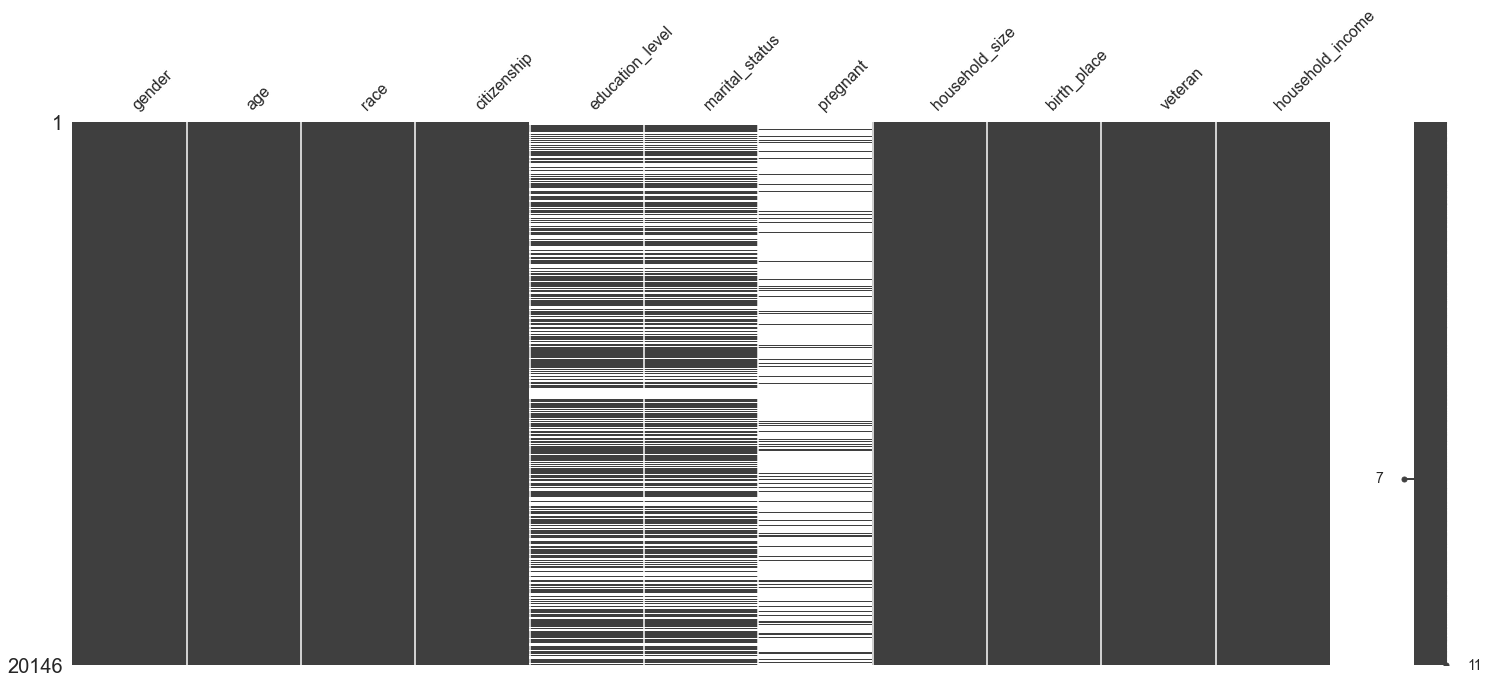

In [246]:
# Visualizing null values
ms.matrix(demo_clean);

In [247]:
# Checking all the value counts to see what needs to be fixed
pf.val_counts(demo_clean)

gender value counts 



2.000    10251
1.000     9895
Name: gender, dtype: int64

--------------------------------------
age value counts 



0.000     801
80.000    728
2.000     569
1.000     555
6.000     477
7.000     471
4.000     452
8.000     450
11.000    438
9.000     434
10.000    433
3.000     416
5.000     414
14.000    388
16.000    381
12.000    366
13.000    348
15.000    343
18.000    329
17.000    305
19.000    288
60.000    236
36.000    221
63.000    218
30.000    216
23.000    215
61.000    214
31.000    211
41.000    211
51.000    209
44.000    209
34.000    207
48.000    207
62.000    207
25.000    206
43.000    205
55.000    205
26.000    205
33.000    204
40.000    203
22.000    203
52.000    202
38.000    200
45.000    200
54.000    195
42.000    195
20.000    194
47.000    193
66.000    193
46.000    192
50.000    192
29.000    192
32.000    190
27.000    188
28.000    187
59.000    185
24.000    183
64.000    183
35.000    183
57.000    182
65.000    175
39.000    174
56.000    172
37.000    171
53.000    169
49.000    161
67.000    158
68.000    157
21.000    157
70.000    156
58.000    152
69.000

--------------------------------------
race value counts 



3.000    6740
4.000    4396
1.000    3651
5.000    3091
2.000    2268
Name: race, dtype: int64

--------------------------------------
citizenship value counts 



1.000    18005
2.000     2112
7.000       13
9.000       10
NaN          6
Name: citizenship, dtype: int64

--------------------------------------
education_level value counts 



NaN      8658
4.000    3462
5.000    2865
3.000    2539
2.000    1467
1.000    1143
9.000      10
7.000       2
Name: education_level, dtype: int64

--------------------------------------
marital_status value counts 



NaN       8658
1.000     5851
5.000     2160
3.000     1273
6.000      972
2.000      857
4.000      369
77.000       4
99.000       2
Name: marital_status, dtype: int64

--------------------------------------
pregnant value counts 



NaN      17549
2.000     2275
3.000      187
1.000      135
Name: pregnant, dtype: int64

--------------------------------------
household_size value counts 



4.000    4161
2.000    3510
3.000    3498
5.000    3453
6.000    1979
7.000    1900
1.000    1645
Name: household_size, dtype: int64

--------------------------------------
birth_place value counts 



1.000     15995
2.000      4144
77.000        4
99.000        3
Name: birth_place, dtype: int64

--------------------------------------
veteran value counts 



2.000    11339
0.000     7736
1.000     1070
7.000        1
Name: veteran, dtype: int64

--------------------------------------
household_income value counts 



15.000    3415
6.000     2202
7.000     1873
14.000    1780
8.000     1553
5.000     1507
4.000     1258
3.000     1176
9.000     1150
10.000     876
2.000      780
12.000     615
1.000      523
0.000      478
77.000     472
13.000     279
99.000     209
Name: household_income, dtype: int64

--------------------------------------


In [248]:
# Changing the values of the gender column and casting as int type
demo_clean['gender'].replace({2.000:1, 1.000:0}, inplace=True)
demo_clean['gender'] = demo_clean['gender'].astype('int64')

In [249]:
# Checking column values
demo_clean.gender.value_counts()

1    10251
0     9895
Name: gender, dtype: int64

In [250]:
# Casting age column as int type
demo_clean['age'] = demo_clean['age'].astype('int64')

In [251]:
# Filling in the names of the values for the race column
demo_clean['race'].replace({1.000:'Mexican', 
                            2.000:'Other Hispanic', 
                            3.000:'White', 
                            4.000:'Black', 
                            5.000:'Other and Multiracial'}, 
                           inplace=True)

In [252]:
# Checking column values
demo_clean.race.value_counts()

White                    6740
Black                    4396
Mexican                  3651
Other and Multiracial    3091
Other Hispanic           2268
Name: race, dtype: int64

In [253]:
# Filling in the names of the values for the citizenship column
demo_clean['citizenship'].replace({1.000:'Citizen', 
                                   2.000:'Not Citizen', 
                                   7.000:'Missing', 
                                   9.000:'Missing'}, 
                                  inplace=True)
# Filling null values as missing
demo_clean['citizenship'].fillna('Missing', inplace=True)

In [254]:
# Checking column values
demo_clean.citizenship.value_counts(dropna=False)

Citizen        18005
Not Citizen     2112
Missing           29
Name: citizenship, dtype: int64

In [255]:
# Filling in the names of the values for the education level column
demo_clean['education_level'].replace({7.000: 0, 
                                       9.000: 0}, 
                                      inplace=True)

# Filling null values and casting to int type
demo_clean['education_level'].fillna(0, inplace=True)
demo_clean['education_level'] = demo_clean['education_level'].astype('int64')

In [256]:
# Checking column values
demo_clean.education_level.value_counts(dropna=False)

0    8670
4    3462
5    2865
3    2539
2    1467
1    1143
Name: education_level, dtype: int64

In [257]:
# Filling in the names of the values for the marital status column
demo_clean['marital_status'].replace({1.000:'Married', 
                                      2.000:'Widowed', 
                                      3.000:'Divorced', 
                                      4.000:'Separated', 
                                      5.000:'Never Married',
                                      6.000:'Partner',
                                      77.000:'Missing', 
                                      99.000:'Missing'}, 
                                      inplace=True)
# Filling null values as missing
demo_clean['marital_status'].fillna('Missing', inplace=True)

In [258]:
# Checking column values
demo_clean.marital_status.value_counts(dropna=False)

Missing          8664
Married          5851
Never Married    2160
Divorced         1273
Partner           972
Widowed           857
Separated         369
Name: marital_status, dtype: int64

In [259]:
# Casting household size column as int type
demo_clean['household_size'] = demo_clean['household_size'].astype('int64')

In [260]:
# Filling in the names of the values for the pregnant column
demo_clean['pregnant'].replace({1.000:'Yes', 
                                2.000:'No', 
                                3.000:'Missing'}, 
                                  inplace=True)
# Filling null values as missing
demo_clean['pregnant'].fillna('Missing', inplace=True)

In [261]:
# Checking column values
demo_clean.pregnant.value_counts(dropna=False)

Missing    17736
No          2275
Yes          135
Name: pregnant, dtype: int64

In [262]:
# Filling in the names of the values for the birth place column
demo_clean['birth_place'].replace({1.000:'USA', 
                                   2.000:'Mexico', 
                                   3.000:'Elsewhere', 
                                   4.000:'Other Spanish Country', 
                                   5.000:'Other Non Spanish Country',
                                   7.000:'Missing', 
                                   9.000:'Missing',
                                   77.000:'Missing', 
                                   99.000:'Missing'}, 
                                    inplace=True)
# Filling null values as missing
demo_clean['birth_place'].fillna('Missing', inplace=True)

In [263]:
# Checking column values
demo_clean.birth_place.value_counts(dropna=False)

USA        15995
Mexico      4144
Missing        7
Name: birth_place, dtype: int64

In [264]:
# Filling in the names of the values for the veteran column
demo_clean['veteran'].replace({1.000:'Yes', 
                               2.000:'No', 
                               7.000:'Missing', 
                               9.000:'Missing',
                               0.000:'Missing'}, 
                                inplace=True)

In [265]:
# Checking column values
demo_clean.veteran.value_counts(dropna=False)

No         11339
Missing     7737
Yes         1070
Name: veteran, dtype: int64

In [266]:
# Fixing the values of the household income column
demo_clean['household_income'].replace({12.000: 5, 
                                        13.000: 4,
                                        14.000: 11,
                                        15.000: 12,
                                        77.000: 0, 
                                        99.000: 0}, 
                                        inplace=True)
# Casting the household income column as int type
demo_clean['household_income'] = demo_clean['household_income'].astype('int64')

In [267]:
# Checking column values
demo_clean.household_income.value_counts(dropna=False)

12    3415
6     2202
5     2122
7     1873
11    1780
8     1553
4     1537
3     1176
0     1159
9     1150
10     876
2      780
1      523
Name: household_income, dtype: int64

In [268]:
# Checking that all null values were filled
demo_clean.isna().sum()

gender              0
age                 0
race                0
citizenship         0
education_level     0
marital_status      0
pregnant            0
household_size      0
birth_place         0
veteran             0
household_income    0
dtype: int64

In [269]:
# Checking columns
demo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20146 entries, 73557 to 93702
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            20146 non-null  int64 
 1   age               20146 non-null  int64 
 2   race              20146 non-null  object
 3   citizenship       20146 non-null  object
 4   education_level   20146 non-null  int64 
 5   marital_status    20146 non-null  object
 6   pregnant          20146 non-null  object
 7   household_size    20146 non-null  int64 
 8   birth_place       20146 non-null  object
 9   veteran           20146 non-null  object
 10  household_income  20146 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.8+ MB


# Occupation

In [271]:
# Combining all the files for the occupation information
path = r'C:\Users\LaptopCheckout\Documents\CSCE_5210\dataOccupation'
df_occupation = pf.glob_concat(path, '*.XPT')

['C:\\Users\\LaptopCheckout\\Documents\\CSCE_5210\\dataOccupation\\OCQ_H.XPT',
 'C:\\Users\\LaptopCheckout\\Documents\\CSCE_5210\\dataOccupation\\OCQ_I.XPT']

In [272]:
# Checking the dataframe
df_occupation.head()

,OCD150,OCQ180,OCQ210,OCD231,OCD241,OCQ260,OCD270,OCQ380,OCD390G,OCD391,OCD392,OCD395,OCQ600,OCQ610,OCQ630,OCQ640,OCQ660
SEQN,,,,,,,,,,,,,,,,,
73557,4.000,NaN,NaN,NaN,NaN,NaN,NaN,3.000,1.000,10.000,16.000,204.000,NaN,NaN,NaN,NaN,NaN
73558,1.000,50.000,NaN,8.000,16.000,1.000,420.000,NaN,2.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73559,4.000,NaN,NaN,NaN,NaN,NaN,NaN,3.000,1.000,21.000,2.000,216.000,NaN,NaN,NaN,NaN,NaN
73561,4.000,NaN,NaN,NaN,NaN,NaN,NaN,4.000,1.000,15.000,8.000,372.000,NaN,NaN,NaN,NaN,NaN
73562,1.000,56.000,NaN,9.000,17.000,2.000,372.000,NaN,2.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [273]:
df_occupation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12791 entries, 73557 to 93702
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   OCD150   12784 non-null  float64
 1   OCQ180   6731 non-null   float64
 2   OCQ210   2126 non-null   float64
 3   OCD231   3418 non-null   float64
 4   OCD241   3421 non-null   float64
 5   OCQ260   6962 non-null   float64
 6   OCD270   6962 non-null   float64
 7   OCQ380   5355 non-null   float64
 8   OCD390G  12784 non-null  float64
 9   OCD391   3434 non-null   float64
 10  OCD392   3437 non-null   float64
 11  OCD395   7091 non-null   float64
 12  OCQ600   3519 non-null   float64
 13  OCQ610   3514 non-null   float64
 14  OCQ630   1019 non-null   float64
 15  OCQ640   3512 non-null   float64
 16  OCQ660   594 non-null    float64
dtypes: float64(17)
memory usage: 1.8 MB


In [274]:
# Listing the columns to look each one up
df_occupation.columns

Index(['OCD150', 'OCQ180', 'OCQ210', 'OCD231', 'OCD241', 'OCQ260', 'OCD270',
       'OCQ380', 'OCD390G', 'OCD391', 'OCD392', 'OCD395', 'OCQ600', 'OCQ610',
       'OCQ630', 'OCQ640', 'OCQ660'],
      dtype='object')

In [275]:
# Listing the columns to keep and creating a new dataframe
occupation_tokeep = ['OCQ210', 'OCQ260', 'OCD270', 'OCQ380',]
occupation_clean = pf.cols_tokeep(df_occupation, occupation_tokeep)

In [276]:
# Checking the new dataframe
occupation_clean.head()

,OCQ210,OCQ260,OCD270,OCQ380
SEQN,,,,
73557,NaN,NaN,NaN,3.000
73558,NaN,1.000,420.000,NaN
73559,NaN,NaN,NaN,3.000
73561,NaN,NaN,NaN,4.000
73562,NaN,2.000,372.000,NaN


## Renaming Columns

In [277]:
# Listing the columns to look each one up
occupation_clean.columns

Index(['OCQ210', 'OCQ260', 'OCD270', 'OCQ380'], dtype='object')

In [278]:
# Renaming the columns
occupation_clean.rename(columns={'OCQ210': 'full_time_work', 
                            'OCQ260': 'work_type', 
                            'OCD270': 'time_in_current_job',
                            'OCQ380': 'out_of_work'
                            }, inplace=True)

In [279]:
# Checking the columns
occupation_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12791 entries, 73557 to 93702
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   full_time_work       2126 non-null   float64
 1   work_type            6962 non-null   float64
 2   time_in_current_job  6962 non-null   float64
 3   out_of_work          5355 non-null   float64
dtypes: float64(4)
memory usage: 499.6 KB


## Clean Column Values

In [280]:
# Checking all values in the dataframe
pf.val_counts(occupation_clean)

full_time_work value counts 



NaN      10665
2.000     1421
1.000      697
9.000        5
7.000        3
Name: full_time_work, dtype: int64

--------------------------------------
work_type value counts 



NaN       5829
1.000     5417
5.000      571
4.000      395
3.000      361
2.000      144
99.000      38
6.000       30
77.000       6
Name: work_type, dtype: int64

--------------------------------------
time_in_current_job value counts 



NaN          5829
24.000        554
12.000        511
36.000        469
60.000        364
48.000        353
120.000       296
72.000        250
84.000        243
6.000         218
3.000         214
96.000        212
18.000        195
0.000         184
2.000         176
1.000         154
180.000       146
144.000       146
4.000         142
240.000       140
108.000       135
132.000       122
7.000         120
8.000         105
5.000         104
156.000        98
168.000        94
192.000        80
300.000        75
216.000        75
9.000          66
204.000        66
360.000        58
264.000        55
10.000         47
276.000        46
420.000        43
30.000         39
252.000        38
16.000         36
288.000        35
480.000        31
228.000        31
312.000        31
336.000        30
324.000        29
15.000         27
11.000         26
14.000         26
396.000        20
372.000        17
17.000         16
13.000         15
408.000        14
19.000         13
42.000    

--------------------------------------
out_of_work value counts 



NaN       7436
3.000     2114
1.000      893
2.000      764
6.000      712
4.000      407
7.000      357
5.000      105
77.000       2
99.000       1
Name: out_of_work, dtype: int64

--------------------------------------


In [281]:
# Replacing values
occupation_clean['full_time_work'].replace({1.000:'Yes', 
                            2.000:'No', 
                            7.000:'Missing', 
                            9.000:'Missing'}, 
                           inplace=True)

In [282]:
# Replacing values
occupation_clean['work_type'].replace({1.000:'Private Wage Worker', 
                            2.000:'Government', 
                            3.000:'Government', 
                            4.000:'Government', 
                            5.000:'Self Employed',
                            6.000:'Family Business',
                            77.000:'Missing',
                            99.000:'Missing'}, 
                           inplace=True)

In [283]:
# Replacing values
occupation_clean['time_in_current_job'].replace({77777.000: 0, 
                            99999.000: 0}, 
                           inplace=True)

In [284]:
# Replacing values
occupation_clean['out_of_work'].replace({1.000:'Home Caretaker', 
                            2.000:'School', 
                            3.000:'Retired', 
                            4.000:'Health', 
                            5.000:'Layoff',
                            6.000:'Disabled',
                            7.000:'Other',
                            77.000:'Missing',
                            99.000:'Missing'}, 
                           inplace=True)

In [285]:
# Filling null values
occupation_clean['time_in_current_job'].fillna(0, inplace=True)

In [286]:
# Casting column as int type
occupation_clean['time_in_current_job'] = occupation_clean['time_in_current_job'].astype('int64')

In [287]:
# Checking null values
occupation_clean.isna().sum()

full_time_work         10665
work_type               5829
time_in_current_job        0
out_of_work             7436
dtype: int64

In [288]:
# Filling null values
occupation_clean.fillna('Missing', inplace=True)

In [289]:
# Checking all value counts again
pf.val_counts(occupation_clean)

full_time_work value counts 



Missing    10673
No          1421
Yes          697
Name: full_time_work, dtype: int64

--------------------------------------
work_type value counts 



Missing                5873
Private Wage Worker    5417
Government              900
Self Employed           571
Family Business          30
Name: work_type, dtype: int64

--------------------------------------
time_in_current_job value counts 



0      6022
24      554
12      511
36      469
60      364
48      353
120     296
72      250
84      243
6       218
3       214
96      212
18      195
2       176
1       154
144     146
180     146
4       142
240     140
108     135
132     122
7       120
8       105
5       104
156      98
168      94
192      80
300      75
216      75
204      66
9        66
360      58
264      55
10       47
276      46
420      43
30       39
252      38
16       36
288      35
480      31
312      31
228      31
336      30
324      29
15       27
11       26
14       26
396      20
372      17
17       16
13       15
408      14
19       13
42       13
20       11
348       8
540       7
456       7
660       5
600       5
384       5
468       5
444       5
516       4
25        3
27        3
33        3
528       3
432       3
504       3
22        3
492       2
32        2
29        2
28        2
26        2
612       2
39        2
46        2
576       2
40        1
44        1
23  

--------------------------------------
out_of_work value counts 



Missing           7439
Retired           2114
Home Caretaker     893
School             764
Disabled           712
Health             407
Other              357
Layoff             105
Name: out_of_work, dtype: int64

--------------------------------------


In [290]:
# Checking the new dataframe
occupation_clean.head()

,full_time_work,work_type,time_in_current_job,out_of_work
SEQN,,,,
73557,Missing,Missing,0,Retired
73558,Missing,Private Wage Worker,420,Missing
73559,Missing,Missing,0,Retired
73561,Missing,Missing,0,Health
73562,Missing,Government,372,Missing


In [291]:
occupation_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12791 entries, 73557 to 93702
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   full_time_work       12791 non-null  object
 1   work_type            12791 non-null  object
 2   time_in_current_job  12791 non-null  int64 
 3   out_of_work          12791 non-null  object
dtypes: int64(1), object(3)
memory usage: 499.6+ KB


### Smoking

In [295]:
# Combining all the files for the smoking information
path = r'C:\Users\LaptopCheckout\Documents\CSCE_5210\dataSmoking'
df_smoking = pf.glob_concat(path, '*.XPT')

['C:\\Users\\LaptopCheckout\\Documents\\CSCE_5210\\dataSmoking\\SMQ_H.XPT',
 'C:\\Users\\LaptopCheckout\\Documents\\CSCE_5210\\dataSmoking\\SMQ_I.XPT']

In [296]:
# Checking the dataframe
df_smoking.head()

,SMQ020,SMD030,SMQ040,SMQ050Q,SMQ050U,SMD055,SMD057,SMQ078,SMD641,SMD650,SMD093,SMDUPCA,SMD100BR,SMD100FL,SMD100MN,SMD100LN,SMD100TR,SMD100NI,SMD100CO,SMQ621,SMD630,SMQ661,SMQ665A,SMQ665B,SMQ665C,SMQ665D,SMQ670,SMQ848,SMQ852Q,SMQ852U,SMAQUEX2,SMQ925,SMQ930,SMQ935,SMQ080,SMQ890,SMQ895,SMQ900,SMQ905,SMQ910,SMQ915
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73557,1.000,17.000,3.000,3.000,4.000,66.000,2.000,NaN,NaN,NaN,NaN,b'',b'',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73558,1.000,0.000,2.000,NaN,NaN,NaN,NaN,NaN,1.000,1.000,1.000,b'',b'',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73559,1.000,20.000,3.000,40.000,4.000,26.000,3.000,NaN,NaN,NaN,NaN,b'',b'',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73561,2.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'',b'',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73562,1.000,18.000,3.000,16.000,4.000,40.000,5.000,NaN,NaN,NaN,NaN,b'',b'',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [297]:
# Checking the columns
df_smoking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14169 entries, 73557 to 93702
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMQ020    12105 non-null  float64
 1   SMD030    5001 non-null   float64
 2   SMQ040    5001 non-null   float64
 3   SMQ050Q   2669 non-null   float64
 4   SMQ050U   2552 non-null   float64
 5   SMD055    2416 non-null   float64
 6   SMD057    2669 non-null   float64
 7   SMQ078    1827 non-null   float64
 8   SMD641    2478 non-null   float64
 9   SMD650    2357 non-null   float64
 10  SMD093    2332 non-null   float64
 11  SMDUPCA   14169 non-null  object 
 12  SMD100BR  14169 non-null  object 
 13  SMD100FL  2095 non-null   float64
 14  SMD100MN  2096 non-null   float64
 15  SMD100LN  2096 non-null   float64
 16  SMD100TR  1580 non-null   float64
 17  SMD100NI  1580 non-null   float64
 18  SMD100CO  1580 non-null   float64
 19  SMQ621    1957 non-null   float64
 20  SMD630    145 non-null  

In [298]:
# Combining all the files for the household smokers information
path = r'C:\Users\LaptopCheckout\Documents\CSCE_5210\dataSmokingHouseHold'
df_hs = pf.glob_concat(path, '*.XPT')

['C:\\Users\\LaptopCheckout\\Documents\\CSCE_5210\\dataSmokingHouseHold\\SMQFAM_H.XPT',
 'C:\\Users\\LaptopCheckout\\Documents\\CSCE_5210\\dataSmokingHouseHold\\SMQFAM_I.XPT']

In [299]:
# Checking the dataframe
df_hs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20146 entries, 73557 to 93702
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SMD460  19708 non-null  float64
 1   SMD470  5165 non-null   float64
 2   SMD480  2251 non-null   float64
dtypes: float64(3)
memory usage: 629.6 KB


In [300]:
# Combining both of the dataframes
df_smoking = pd.concat([df_smoking, df_hs], axis=1)

In [301]:
# Checking the dataframe
df_smoking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20146 entries, 73557 to 93702
Data columns (total 44 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMQ020    12105 non-null  float64
 1   SMD030    5001 non-null   float64
 2   SMQ040    5001 non-null   float64
 3   SMQ050Q   2669 non-null   float64
 4   SMQ050U   2552 non-null   float64
 5   SMD055    2416 non-null   float64
 6   SMD057    2669 non-null   float64
 7   SMQ078    1827 non-null   float64
 8   SMD641    2478 non-null   float64
 9   SMD650    2357 non-null   float64
 10  SMD093    2332 non-null   float64
 11  SMDUPCA   14169 non-null  object 
 12  SMD100BR  14169 non-null  object 
 13  SMD100FL  2095 non-null   float64
 14  SMD100MN  2096 non-null   float64
 15  SMD100LN  2096 non-null   float64
 16  SMD100TR  1580 non-null   float64
 17  SMD100NI  1580 non-null   float64
 18  SMD100CO  1580 non-null   float64
 19  SMQ621    1957 non-null   float64
 20  SMD630    145 non-null  

In [302]:
# Listing the columns to keep and creating a new dataframe
smoking_tokeep = ['SMD460', 'SMD415', 'SMQ040', 'SMD030', 'SMQ050Q','SMD650', 
                   'SMQ050U', 'SMD057']
smoking_clean = pf.cols_tokeep(df_smoking, smoking_tokeep)

In [303]:
# Checking the new dataframe
smoking_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20146 entries, 73557 to 93702
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SMD030   5001 non-null   float64
 1   SMQ040   5001 non-null   float64
 2   SMQ050Q  2669 non-null   float64
 3   SMQ050U  2552 non-null   float64
 4   SMD057   2669 non-null   float64
 5   SMD650   2357 non-null   float64
 6   SMD460   19708 non-null  float64
dtypes: float64(7)
memory usage: 1.2 MB


## Days Since Quitting

In [304]:
# Checking column values
smoking_clean.SMQ050Q.value_counts(dropna=False)

NaN          17477
30.000         164
20.000         155
2.000          142
3.000          137
15.000         137
10.000         135
5.000          121
4.000          112
25.000         106
1.000          103
66666.000       96
40.000          92
6.000           88
8.000           77
7.000           76
35.000          58
14.000          53
12.000          52
9.000           49
18.000          47
13.000          44
23.000          38
24.000          36
22.000          36
45.000          36
16.000          34
28.000          33
17.000          32
33.000          29
21.000          28
26.000          26
39.000          22
99999.000       21
11.000          21
34.000          21
19.000          20
31.000          19
32.000          18
37.000          17
44.000          16
27.000          16
42.000          15
38.000          14
29.000          13
41.000          12
46.000          11
36.000          11
47.000          11
48.000           7
43.000           7
49.000           4
90.000      

In [305]:
# Checking column values
smoking_clean.SMQ050U.value_counts(dropna=False)

NaN      17594
4.000     2277
3.000      203
2.000       48
1.000       24
Name: SMQ050U, dtype: int64

In [306]:
# Fill null values
smoking_clean.SMQ050Q.fillna(0, inplace=True)

In [307]:
# Replace values and fill null values
smoking_clean.SMQ050U.replace({2.000: 7,
                            3.000: 30, 
                            4.000: 365}, 
                            inplace=True)
smoking_clean.SMQ050U.fillna(0, inplace=True)

In [308]:
# Multiply two columns together into one column
smoking_clean['days_quit_smoking'] = smoking_clean['SMQ050Q'] * smoking_clean['SMQ050U']

In [309]:
# Change entries of the 66666 option to appropriate number
smoking_clean.loc[smoking_clean['SMQ050Q'] == 66666, 'days_quit_smoking'] = 18250

In [310]:
# Checking that the values were changed
smoking_clean[smoking_clean['SMQ050Q'] == 66666]

,SMD030,SMQ040,SMQ050Q,SMQ050U,SMD057,SMD650,SMD460,days_quit_smoking
SEQN,,,,,,,,
73672,13.000,3.000,66666.000,0.000,20.000,NaN,0.000,18250.000
73766,19.000,3.000,66666.000,0.000,20.000,NaN,0.000,18250.000
73873,18.000,3.000,66666.000,0.000,2.000,NaN,0.000,18250.000
74138,14.000,3.000,66666.000,0.000,8.000,NaN,0.000,18250.000
74508,18.000,3.000,66666.000,0.000,7.000,NaN,0.000,18250.000
74790,16.000,3.000,66666.000,0.000,10.000,NaN,0.000,18250.000
75117,20.000,3.000,66666.000,0.000,5.000,NaN,0.000,18250.000
75343,18.000,3.000,66666.000,0.000,20.000,NaN,0.000,18250.000
75774,28.000,3.000,66666.000,0.000,10.000,NaN,0.000,18250.000


In [311]:
# Checking values
smoking_clean['days_quit_smoking'].value_counts(dropna=False)

0.000        17498
7300.000       154
10950.000      153
5475.000       131
3650.000       129
730.000        106
1825.000       106
9125.000       105
18250.000       96
1095.000        94
14600.000       91
1460.000        87
365.000         69
2555.000        68
2920.000        66
12775.000       58
2190.000        57
4380.000        52
5110.000        48
3285.000        41
4745.000        39
8395.000        38
8760.000        36
16425.000       35
6570.000        34
8030.000        34
10220.000       33
5840.000        33
90.000          30
6205.000        30
12045.000       29
7665.000        27
180.000         26
9490.000        25
60.000          23
14235.000       22
120.000         21
4015.000        20
6935.000        20
11315.000       19
30.000          19
12410.000       19
11680.000       17
7.000           16
13505.000       16
16060.000       16
15330.000       15
9855.000        15
13870.000       14
10585.000       13
150.000         13
540.000         13
21.000      

In [312]:
# Dropping old columns and casting to int type
smoking_clean.drop(columns=['SMQ050Q', 'SMQ050U'], inplace=True)
smoking_clean['days_quit_smoking'] = smoking_clean['days_quit_smoking'].astype('int64')

In [313]:
# Checking the dataframe
smoking_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20146 entries, 73557 to 93702
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SMD030             5001 non-null   float64
 1   SMQ040             5001 non-null   float64
 2   SMD057             2669 non-null   float64
 3   SMD650             2357 non-null   float64
 4   SMD460             19708 non-null  float64
 5   days_quit_smoking  20146 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 1.1 MB


## Household Smokers

In [314]:
# Checking column values
smoking_clean.SMD460.value_counts(dropna=False)

0.000      14531
1.000       3206
2.000       1559
NaN          438
3.000        400
777.000        9
999.000        3
Name: SMD460, dtype: int64

In [315]:
# Filling null values
smoking_clean.SMD460.fillna(4,inplace=True)


In [316]:
# Adding columns together
smoking_clean['household_smokers'] = smoking_clean['SMD460'] 

In [317]:
# Checking column values
smoking_clean['household_smokers'].value_counts(dropna=False)

0.000      14531
1.000       3206
2.000       1559
4.000        438
3.000        400
777.000        9
999.000        3
Name: household_smokers, dtype: int64

In [318]:
# Replacing column values and casting as int type
smoking_clean['household_smokers'].replace({4.000: 0, 
                                            5.000: 1, 
                                            6.000: 2, 
                                            7.000:3, 
                                            8.000: 4,
                                            1003.000: 4,
                                            781.000: 4}, 
                                           inplace=True)
smoking_clean['household_smokers'] = smoking_clean['household_smokers'].astype('int64')

In [319]:
# Verifying column values
smoking_clean['household_smokers'].value_counts(dropna=False)

0      14969
1       3206
2       1559
3        400
777        9
999        3
Name: household_smokers, dtype: int64

In [320]:
# Dropping old columns
smoking_clean.drop(columns=['SMD460'], inplace=True)

In [321]:
# Checking the dataframe
smoking_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20146 entries, 73557 to 93702
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SMD030             5001 non-null   float64
 1   SMQ040             5001 non-null   float64
 2   SMD057             2669 non-null   float64
 3   SMD650             2357 non-null   float64
 4   days_quit_smoking  20146 non-null  int64  
 5   household_smokers  20146 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 1.1 MB


## Renaming Columns

In [323]:
# Listing columns to look up ones to rename
smoking_clean.columns

Index(['SMD030', 'SMQ040', 'SMD057', 'SMD650', 'days_quit_smoking',
       'household_smokers'],
      dtype='object')

In [324]:
# Renaming columns
smoking_clean.rename(columns={'SMD030': 'start_smoking_age', 
                              'SMQ040': 'current_smoker', 
                              'SMD057': 'previous_cigarettes_per_day', 
                              'SMD650': 'current_cigarettes_per_day'}, 
                            inplace=True)

In [325]:
# Checking dataframe
smoking_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20146 entries, 73557 to 93702
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   start_smoking_age            5001 non-null   float64
 1   current_smoker               5001 non-null   float64
 2   previous_cigarettes_per_day  2669 non-null   float64
 3   current_cigarettes_per_day   2357 non-null   float64
 4   days_quit_smoking            20146 non-null  int64  
 5   household_smokers            20146 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 1.1 MB


## Clean Column Values

In [326]:
# Checking column values
smoking_clean.current_smoker.value_counts(dropna=False)

NaN      15145
3.000     2669
1.000     1824
2.000      508
Name: current_smoker, dtype: int64

In [327]:
# Replacing values to be in ordinal order, filling nulls, and casting as int type
smoking_clean.current_smoker.replace({7.000: 0, 1.000: 3, 3.000: 1}, inplace=True)
smoking_clean.current_smoker.fillna(0, inplace=True)
smoking_clean.current_smoker = smoking_clean.current_smoker.astype('int64')

In [328]:
# Checking column values
smoking_clean.current_smoker.value_counts(dropna=False)

0    15145
1     2669
3     1824
2      508
Name: current_smoker, dtype: int64

In [329]:
# Listing remaining columns that need cleaning
smoking_list = ['start_smoking_age', 'previous_cigarettes_per_day', 
                'current_cigarettes_per_day']

In [330]:
# Listing column values
for col in smoking_list:
    display(smoking_clean[col].value_counts(dropna=False))

NaN        15145
18.000       712
16.000       581
17.000       516
15.000       464
20.000       355
19.000       304
14.000       300
13.000       248
0.000        197
21.000       194
12.000       158
22.000       156
25.000       149
23.000        97
30.000        73
10.000        51
24.000        50
11.000        48
9.000         37
27.000        32
26.000        27
28.000        27
999.000       26
40.000        24
35.000        23
8.000         21
32.000        21
7.000         19
29.000        12
45.000         9
31.000         7
42.000         7
37.000         7
36.000         6
39.000         5
44.000         5
38.000         4
46.000         4
43.000         4
48.000         3
34.000         3
58.000         2
55.000         2
777.000        2
41.000         2
33.000         2
49.000         2
64.000         1
50.000         1
54.000         1
Name: start_smoking_age, dtype: int64

NaN        17477
20.000       601
10.000       412
1.000        239
5.000        204
3.000        187
40.000       158
2.000        156
30.000       123
4.000        119
6.000         90
15.000        68
60.000        47
8.000         44
7.000         42
12.000        36
999.000       32
50.000        16
25.000        16
80.000        10
95.000        10
18.000         9
9.000          6
35.000         5
70.000         4
17.000         3
14.000         3
90.000         3
24.000         2
27.000         2
16.000         2
11.000         2
45.000         2
29.000         1
48.000         1
47.000         1
75.000         1
42.000         1
26.000         1
13.000         1
55.000         1
49.000         1
36.000         1
37.000         1
38.000         1
39.000         1
31.000         1
53.000         1
28.000         1
Name: previous_cigarettes_per_day, dtype: int64

NaN        17789
10.000       450
20.000       401
5.000        220
1.000        196
3.000        179
2.000        172
15.000       144
4.000        129
6.000        100
7.000         77
30.000        60
12.000        57
8.000         55
40.000        29
25.000        14
9.000         13
18.000        12
11.000        10
13.000         8
50.000         5
999.000        4
17.000         4
14.000         3
16.000         2
60.000         2
19.000         2
23.000         2
27.000         1
90.000         1
29.000         1
28.000         1
35.000         1
26.000         1
95.000         1
Name: current_cigarettes_per_day, dtype: int64

In [331]:
# Replacing values, filling nulls, casting as int type, and verifying values
for col in smoking_list:
    smoking_clean[col].replace({777.000: 0,
                               999.000: 0}, 
                               inplace=True)
    smoking_clean[col].fillna(0, inplace=True)
    smoking_clean[col] = smoking_clean[col].astype('int64')
    display(smoking_clean[col].value_counts(dropna=False))

0     15370
18      712
16      581
17      516
15      464
20      355
19      304
14      300
13      248
21      194
12      158
22      156
25      149
23       97
30       73
10       51
24       50
11       48
9        37
27       32
28       27
26       27
40       24
35       23
8        21
32       21
7        19
29       12
45        9
42        7
37        7
31        7
36        6
39        5
44        5
38        4
46        4
43        4
34        3
48        3
49        2
33        2
41        2
55        2
58        2
64        1
50        1
54        1
Name: start_smoking_age, dtype: int64

0     17509
20      601
10      412
1       239
5       204
3       187
40      158
2       156
30      123
4       119
6        90
15       68
60       47
8        44
7        42
12       36
50       16
25       16
95       10
80       10
18        9
9         6
35        5
70        4
90        3
14        3
17        3
11        2
16        2
27        2
24        2
45        2
42        1
13        1
75        1
26        1
29        1
48        1
47        1
31        1
49        1
36        1
37        1
38        1
39        1
55        1
53        1
28        1
Name: previous_cigarettes_per_day, dtype: int64

0     17793
10      450
20      401
5       220
1       196
3       179
2       172
15      144
4       129
6       100
7        77
30       60
12       57
8        55
40       29
25       14
9        13
18       12
11       10
13        8
50        5
17        4
14        3
19        2
60        2
16        2
23        2
27        1
90        1
29        1
28        1
35        1
26        1
95        1
Name: current_cigarettes_per_day, dtype: int64

In [332]:
# Checking the dataframe
smoking_clean.head()

,start_smoking_age,current_smoker,previous_cigarettes_per_day,current_cigarettes_per_day,days_quit_smoking,household_smokers
SEQN,,,,,,
73557,17,1,2,0,1095,1
73558,0,2,0,1,0,2
73559,20,1,3,0,14600,0
73560,0,0,0,0,0,1
73561,0,0,0,0,0,0


In [333]:
smoking_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20146 entries, 73557 to 93702
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   start_smoking_age            20146 non-null  int64
 1   current_smoker               20146 non-null  int64
 2   previous_cigarettes_per_day  20146 non-null  int64
 3   current_cigarettes_per_day   20146 non-null  int64
 4   days_quit_smoking            20146 non-null  int64
 5   household_smokers            20146 non-null  int64
dtypes: int64(6)
memory usage: 1.1 MB


# Combine Data

In [336]:
# Checking the column lengths of all the dataframes
dataframes = [target_clean, demo_clean, occupation_clean, 
              smoking_clean]
for df in dataframes:
    print(len(df.columns))

1
11
4
6


In [337]:
# Putting all the data together and looking at the dataframe
full_df = pd.concat([target_clean, demo_clean, occupation_clean,smoking_clean], 
                     axis=1)
full_df.head()

,depression,gender,age,race,citizenship,education_level,marital_status,pregnant,household_size,birth_place,veteran,household_income,full_time_work,work_type,time_in_current_job,out_of_work,start_smoking_age,current_smoker,previous_cigarettes_per_day,current_cigarettes_per_day,days_quit_smoking,household_smokers
SEQN,,,,,,,,,,,,,,,,,,,,,,
73557,Not Depressed,0,69,Black,Citizen,3,Separated,Missing,3,USA,Yes,4,Missing,Missing,0.000,Retired,17,1,2,0,1095,1
73558,Not Depressed,0,54,White,Citizen,3,Married,Missing,4,USA,No,7,Missing,Private Wage Worker,420.000,Missing,0,2,0,1,0,2
73559,Not Depressed,0,72,White,Citizen,4,Married,Missing,2,USA,Yes,10,Missing,Missing,0.000,Retired,20,1,3,0,14600,0
73560,NaN,0,9,White,Citizen,0,Missing,Missing,4,USA,Missing,9,NaN,NaN,NaN,NaN,0,0,0,0,0,1
73561,Not Depressed,1,73,White,Citizen,5,Married,Missing,2,USA,No,12,Missing,Missing,0.000,Health,0,0,0,0,0,0


In [338]:
# Keeping only the entries that are not null for the target
full_df = full_df[full_df['depression'].notnull()]
full_df.head()

,depression,gender,age,race,citizenship,education_level,marital_status,pregnant,household_size,birth_place,veteran,household_income,full_time_work,work_type,time_in_current_job,out_of_work,start_smoking_age,current_smoker,previous_cigarettes_per_day,current_cigarettes_per_day,days_quit_smoking,household_smokers
SEQN,,,,,,,,,,,,,,,,,,,,,,
73557,Not Depressed,0,69,Black,Citizen,3,Separated,Missing,3,USA,Yes,4,Missing,Missing,0.000,Retired,17,1,2,0,1095,1
73558,Not Depressed,0,54,White,Citizen,3,Married,Missing,4,USA,No,7,Missing,Private Wage Worker,420.000,Missing,0,2,0,1,0,2
73559,Not Depressed,0,72,White,Citizen,4,Married,Missing,2,USA,Yes,10,Missing,Missing,0.000,Retired,20,1,3,0,14600,0
73561,Not Depressed,1,73,White,Citizen,5,Married,Missing,2,USA,No,12,Missing,Missing,0.000,Health,0,0,0,0,0,0
73562,Depressed,0,56,Mexican,Citizen,4,Divorced,Missing,1,USA,Yes,9,Missing,Government,372.000,Missing,18,1,5,0,5840,0


In [339]:
# Checking the info
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10506 entries, 73557 to 93702
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   depression                   10506 non-null  object 
 1   gender                       10506 non-null  int64  
 2   age                          10506 non-null  int64  
 3   race                         10506 non-null  object 
 4   citizenship                  10506 non-null  object 
 5   education_level              10506 non-null  int64  
 6   marital_status               10506 non-null  object 
 7   pregnant                     10506 non-null  object 
 8   household_size               10506 non-null  int64  
 9   birth_place                  10506 non-null  object 
 10  veteran                      10506 non-null  object 
 11  household_income             10506 non-null  int64  
 12  full_time_work               10506 non-null  object 
 13  work_type   

In [340]:
# Checking null values
full_df.isna().sum()

depression                     0
gender                         0
age                            0
race                           0
citizenship                    0
education_level                0
marital_status                 0
pregnant                       0
household_size                 0
birth_place                    0
veteran                        0
household_income               0
full_time_work                 0
work_type                      0
time_in_current_job            0
out_of_work                    0
start_smoking_age              0
current_smoker                 0
previous_cigarettes_per_day    0
current_cigarettes_per_day     0
days_quit_smoking              0
household_smokers              0
dtype: int64

In [342]:
# Filling in the rest of the nulls with zero as appropriate
full_df.fillna(0, inplace=True)
full_df.isna().sum()

depression                     0
gender                         0
age                            0
race                           0
citizenship                    0
education_level                0
marital_status                 0
pregnant                       0
household_size                 0
birth_place                    0
veteran                        0
household_income               0
full_time_work                 0
work_type                      0
time_in_current_job            0
out_of_work                    0
start_smoking_age              0
current_smoker                 0
previous_cigarettes_per_day    0
current_cigarettes_per_day     0
days_quit_smoking              0
household_smokers              0
dtype: int64

In [344]:
# Saving the file
full_df.to_csv(r'FullData.csv')